#### Research task

Класифікація датсету

https://archive.ics.uci.edu/ml/datasets/glass+identification

Задача - усунення дисбалансу і перевірка впливу на точність моделі

Датасет на енкодери:

https://archive.ics.uci.edu/ml/datasets/Mushroom

Задача - спробувати і розібратись як кодують


#### refgerences:

https://www.youtube.com/watch?v=vksQx1JNo8Y

#### Class Labels

- 1: building_windows_float_processed
- 2: building_windows_non_float_processed
- 3: vehicle_windows_float_processed
- 4: vehicle_windows_non_float_processed (none in this database)
- 5: containers
- 6: tableware
- 7: headlamps

#### Additional Information

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
     -- 1 building_windows_float_processed
     -- 2 building_windows_non_float_processed
     -- 3 vehicle_windows_float_processed
     -- 4 vehicle_windows_non_float_processed (none in this database)
     -- 5 containers
     -- 6 tableware
     -- 7 headlamps

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/dataset-lesson7-glass/glass_dataset.csv')
df.head(5)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()
print('----------------------------------------------------')
print('\n','targets: ',df['class'].unique())
print('\n','isnul ----------------------------------------------------')
print(df.isnull().sum())
print('\n','isna ----------------------------------------------------')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  class   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
----------------------------------------------------

 targets:  [1 2 3 5 6 7]

 isnul ----------------------------------------------------
ID       0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
class    0
dtype: int64

 isna ----------------------------------------------------
ID       0
RI       0
Na     

- there is no missing values in dataset
- there is no Nan values in dataset

In [5]:
print(df['class'].value_counts())

class
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


### convert 7-class classification problem into 2-class classification problem

In [13]:
df['class2'] = df['class'].apply(lambda value: (0 if value <= 4 else 1))
df['class2'] = pd.Categorical(df['class2'], categories=[0,1])
print(df['class2'].value_counts())

class2
0    163
1     51
Name: count, dtype: int64


- we can see that dataset is imbalanced

### Drop constant and duplicated features

In [128]:
df2=df.drop_duplicates()
print(df.shape)
print(df2.shape)

(214, 12)
(214, 12)


- dataset do not contain duplicates

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


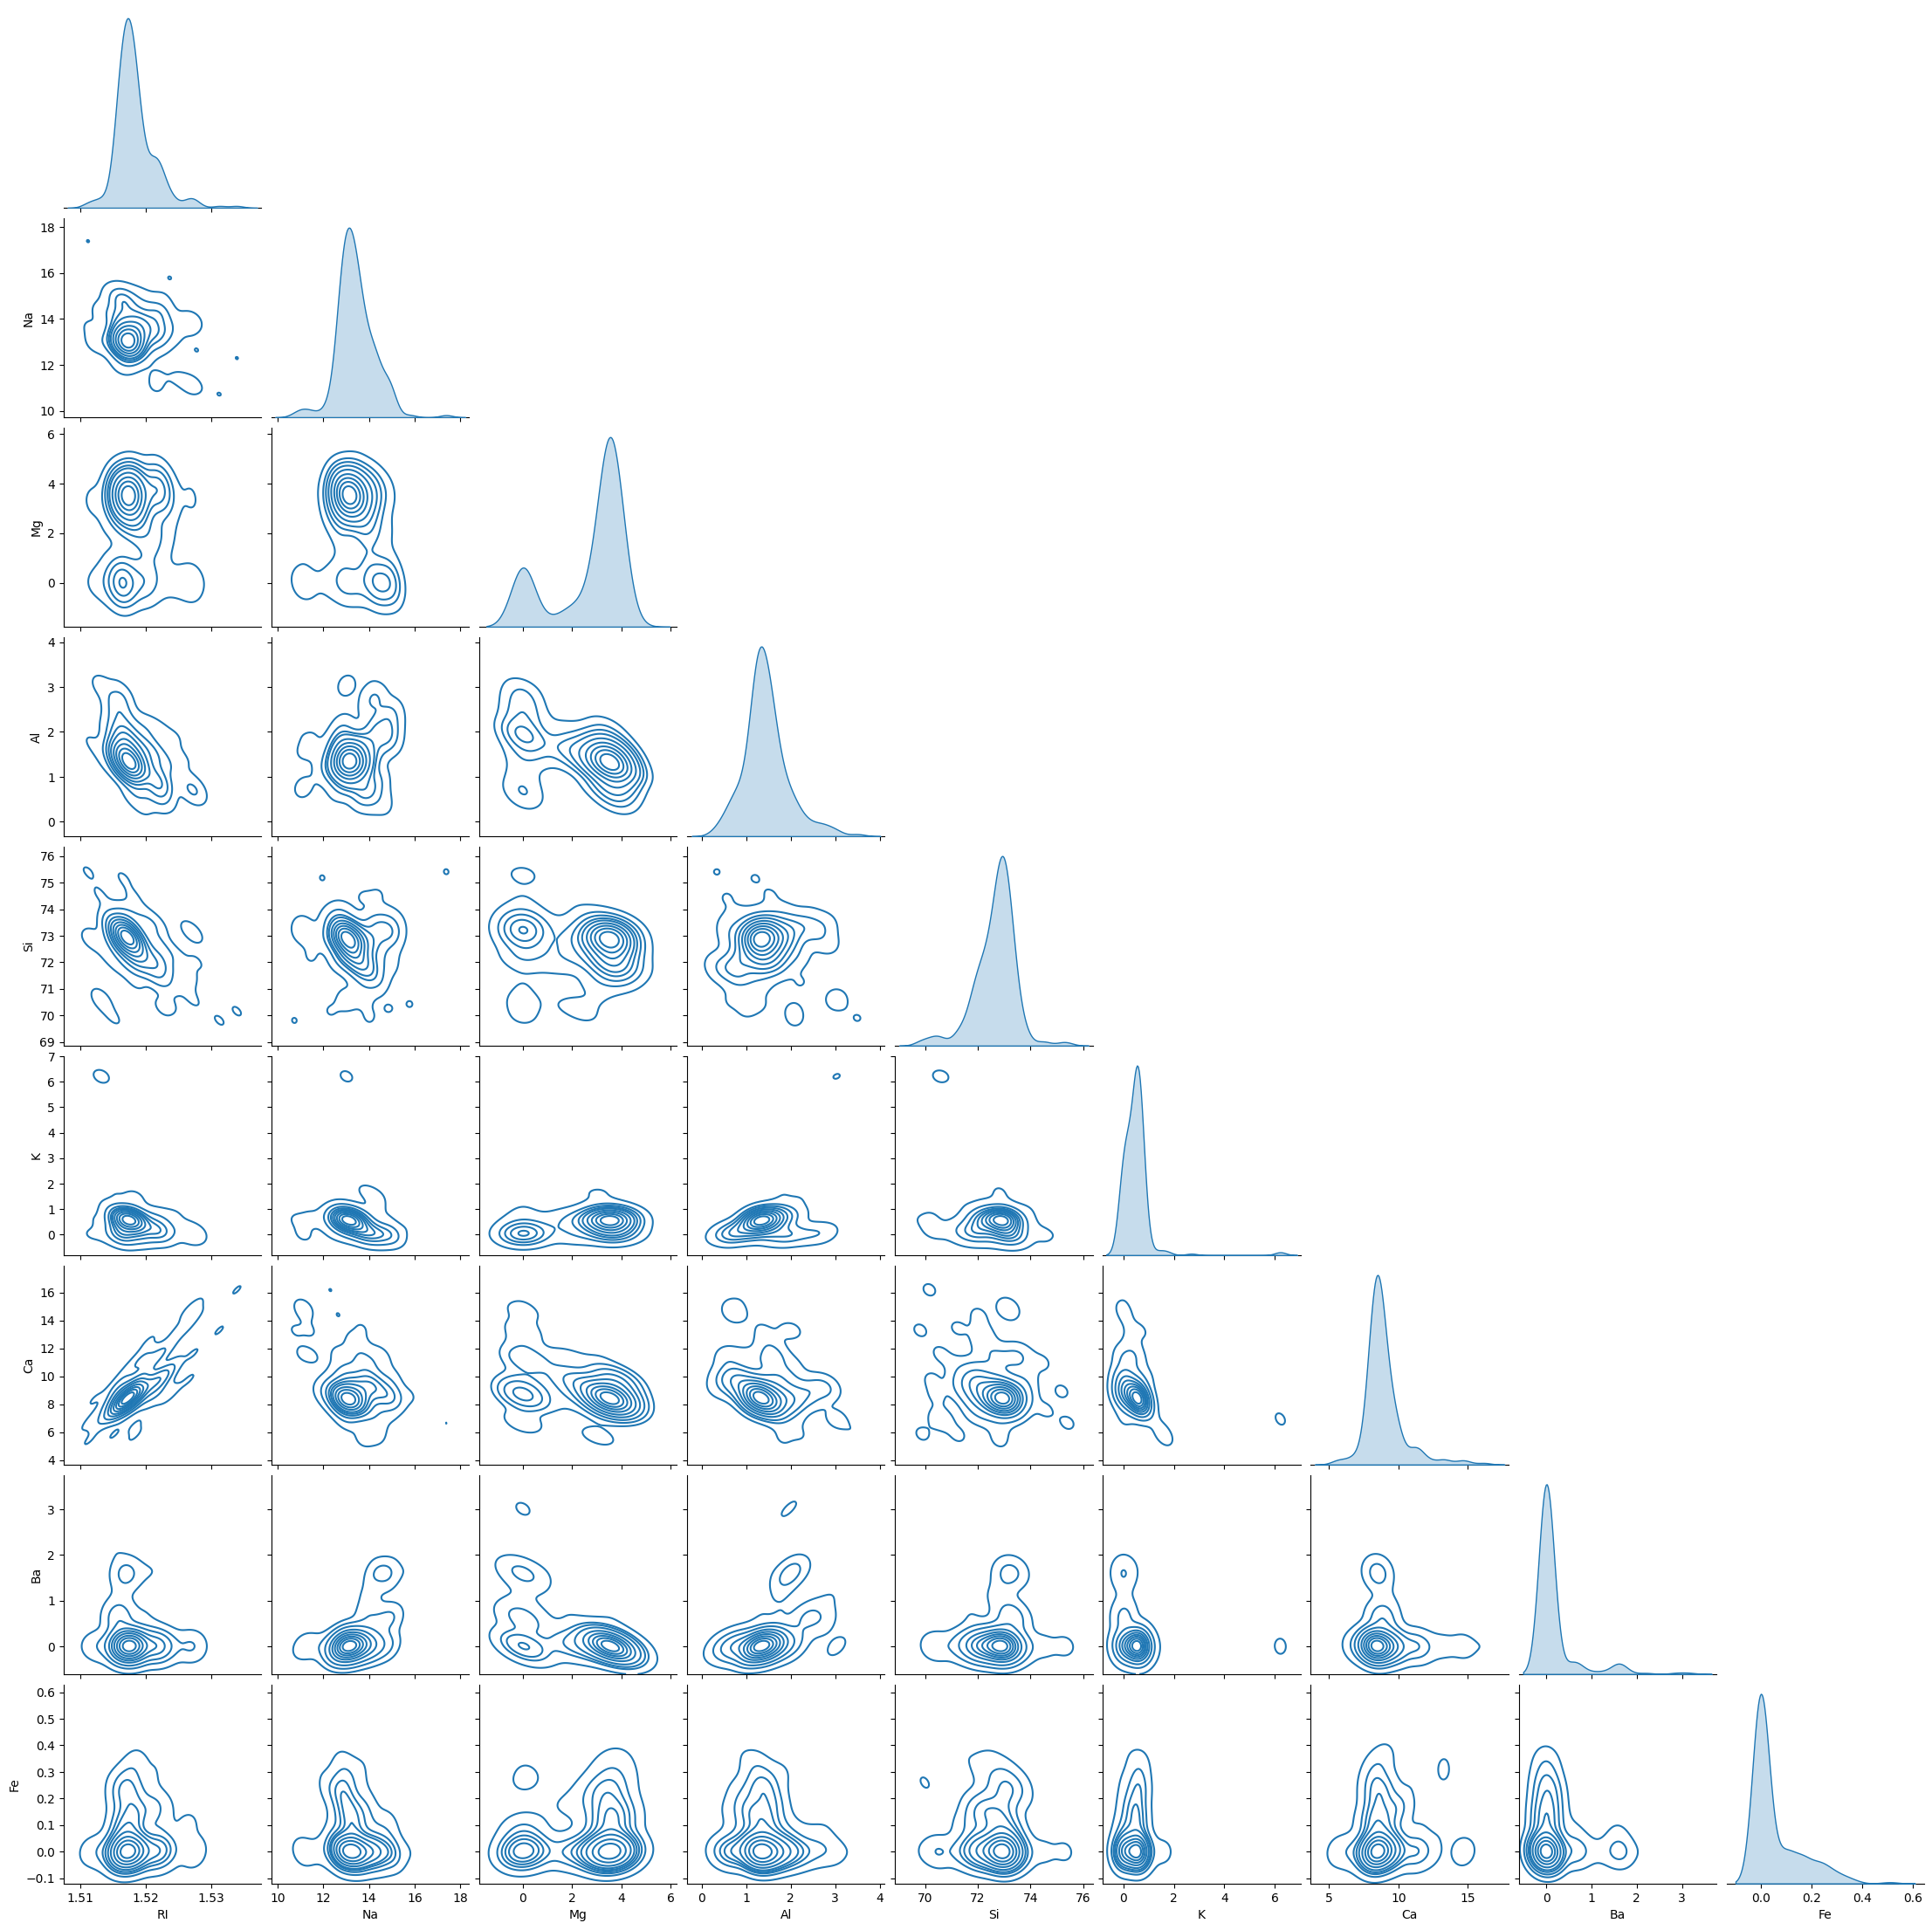

In [6]:
features=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
sns.pairplot(df[features], kind="kde",corner=True)

- we can see that Mg does not describe very well. Moreover it includes a lot more data compare other features, threfore we can try to remove 

In [19]:
#df1=df[df['Mg']>3]
#df1['Mg'].plot.hist(bins=50)
#print(df1['class2'].value_counts())

### Classification imbalanced dataset

In [32]:
# Standartizatiob/Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [75]:
features_norm = StandardScaler().fit_transform(df[features])
features_norm = pd.DataFrame(data=features_norm)

# Let's see how the data looks after normalization
features_norm.head()

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df['class2'], test_size = 0.3, random_state = 42)

print('train set: ',X_train.shape)
print('test set: ',X_test.shape)


##########################################################################
##########################################################################

model = KNeighborsClassifier(n_neighbors=16,weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

train set:  (149, 9)
test set:  (65, 9)
Accuracy: 90.77%


Confusion matrix:
 [[45  1]
 [ 5 14]]


/tmp/ipykernel_32/3179007830.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_32/3179007830.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


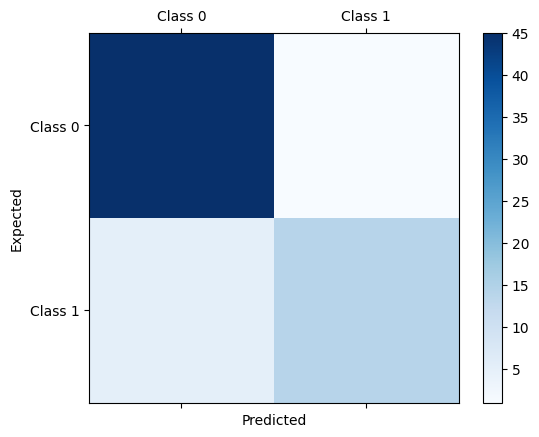

In [33]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

- As axpected due to the small data for training, confusion matrix indicates miss-classification mainly for class 1

### Dealing with imbalanced class

- Most of the techniques for cormalization imbalassed classes need to be applied after splitting data into train and test. 
- Test set class imbalancy does not necessery need to be corrected

#### A. Random under-sampling

In [76]:
# concatenate training data back together
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class2
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.0,0.00,0
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,0
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.0,0.08,0
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.00,1
31,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.0,0.00,0


In [77]:
# Class count
count_class2_0, count_class2_1 = df_train['class2'].value_counts()
print('class 0: ',count_class2_0)
print('class 1: ',count_class2_1)

# separate minority and majority class
df_train_0 = df_train[df_train.class2==0]
df_train_1 = df_train[df_train.class2==1]

class 0:  117
class 1:  32


In [87]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00
...,...,...,...,...,...,...,...,...,...
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00


Accuracy: 93.85%


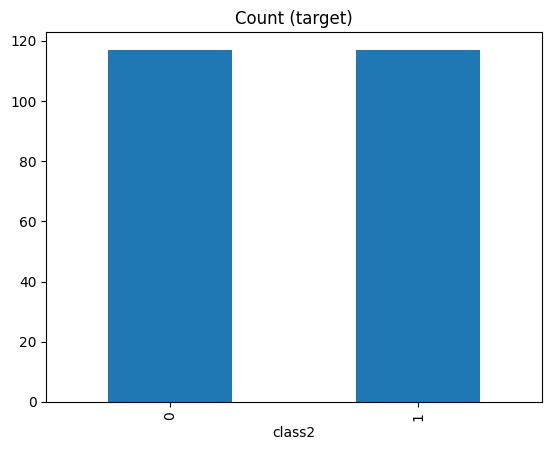

In [90]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
df_train_1_up = resample(df_train_1,
                           replace = True, # Sample with replacement
                           n_samples = len(df_train_0), # Match number in majority class
                           random_state=27)

# combine majority and upsampled minority
##########################################################################
df_train_up = pd.concat([df_train_0, df_train_1_up])

df_train_up['class2'].value_counts().plot(kind='bar', title='Count (target)');

##########################################################################
model = KNeighborsClassifier(n_neighbors=16,weights='distance')
model.fit(df_train_up[features], df_train_up['class2'])
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#### B. Generate Synthetic Samples

SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.


Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [95]:
X_train_SMOTE

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.517110,12.890000,3.620000,1.570000,72.960000,0.610000,8.110000,0.000000,0.000000
1,1.520990,13.690000,3.590000,1.120000,71.960000,0.090000,9.400000,0.000000,0.000000
2,1.522220,14.430000,0.000000,1.000000,72.670000,0.100000,11.520000,0.000000,0.080000
3,1.518880,14.990000,0.780000,1.740000,72.500000,0.000000,9.950000,0.000000,0.000000
4,1.517470,12.840000,3.500000,1.140000,73.270000,0.560000,8.550000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
229,1.516102,14.192533,0.000000,2.669013,72.984875,0.049691,9.435803,0.635832,0.003549
230,1.516633,14.892943,0.000000,1.902197,73.087710,0.000000,8.635326,1.432011,0.019814
231,1.516847,14.539952,0.000000,1.986075,73.294253,0.000000,8.526075,1.576075,0.065747
232,1.518645,14.986534,0.712405,1.785930,72.569328,0.000000,9.842541,0.058062,0.000000


In [98]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

# fit the sampling
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
print(np.unique(y_train_SMOTE, return_counts=True))

##########################################################################
model = KNeighborsClassifier(n_neighbors=16,weights='distance')
model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(array([0, 1]), array([117, 117]))
Accuracy: 93.85%


#### C. Random Over-sampling

random over-sampling bootstraps observations from the minority class to increase their number. This technique in essence duplicates data, so sometimes leads to over-fitting.

https://www.kaggle.com/code/solegalli/machine-learning-with-imbalanced-data

In [132]:
from imblearn.over_sampling import RandomOverSampler
    
ros = RandomOverSampler(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,
)

# resample
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# we would have a lot more observations from the majority class now
X_train.shape, X_resampled.shape

print(y_resampled.value_counts(normalize=True))

##########################################################################
model = KNeighborsClassifier(n_neighbors=16,weights='distance')
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

class2
0    0.5
1    0.5
Name: proportion, dtype: float64
Accuracy: 93.85%


### t-SNE

This gives us an indication that further predictive models will perform pretty well in separating cases 

In [106]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import  PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [123]:
# New_df is from the random undersample data (fewer instances)
X = X_train
y = y_train


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.9 s
PCA took 0.0013 s
Truncated SVD took 0.0027 s


In [122]:
# New_df is from the random undersample data (fewer instances)
X2 = X_test
y2 = y_test


# T-SNE Implementation
t0 = time.time()
X2_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X2.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X2_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X2.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X2_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X2.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 0.4 s
PCA took 0.0014 s
Truncated SVD took 0.0031 s


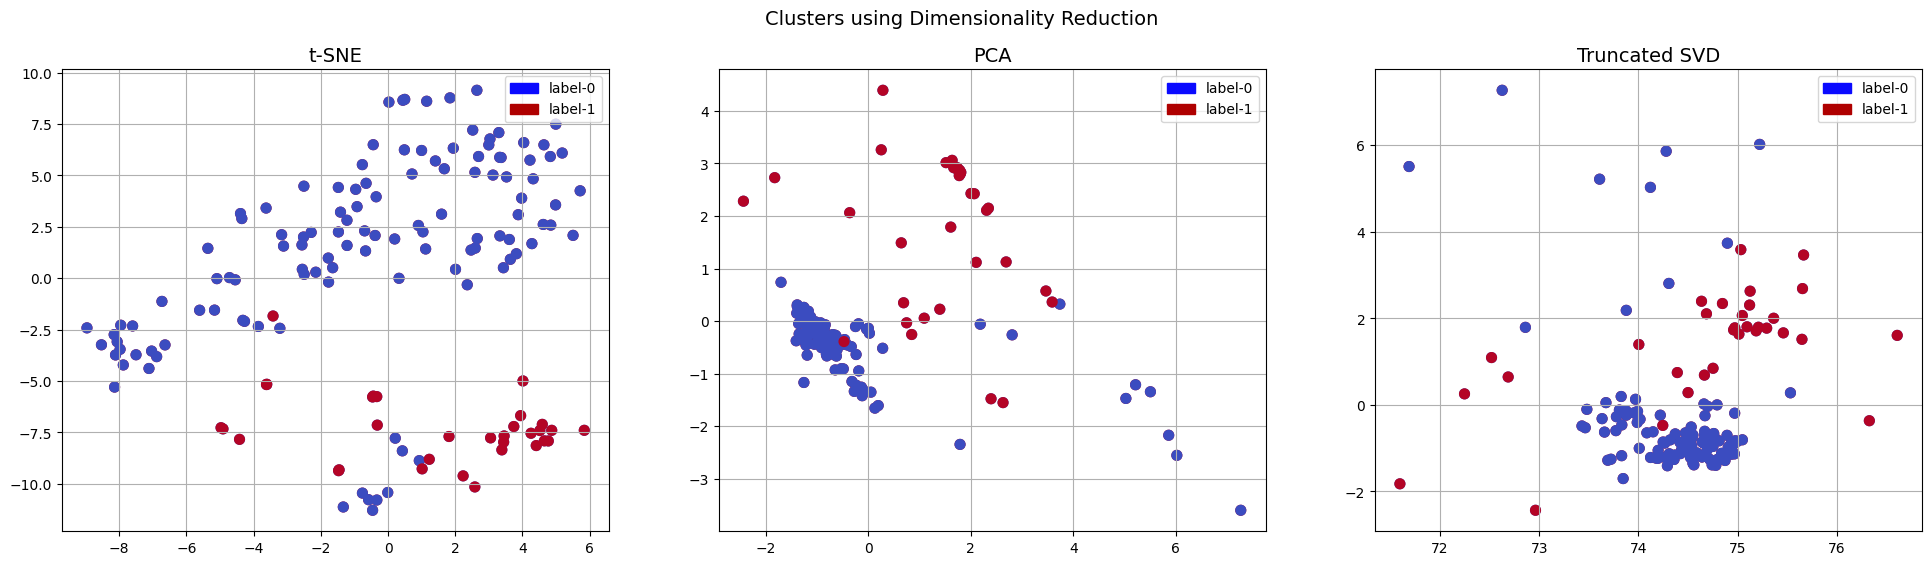

In [112]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='label-0')
red_patch = mpatches.Patch(color='#AF0000', label='label-1')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [127]:
##########################################################################
model = KNeighborsClassifier(n_neighbors=16,weights='distance')
model.fit(X_reduced_tsne, y_train)
    y_pred = model.predict(X2_reduced_tsne)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 70.77%


- Accuracy with T-SNE: 70.77%
- Accuracy with PCA: 76.92%
- Accuracy with SVD: 92.31%

we can see that SVD feature dimensionality works better for our dataset than PCA or T-SNE 

## Conclusion

- dataset is relatively clean without diblicates
- dataset classes were converted into 2-class target for simplicity of the analysis
- up-sampling, SMOTE and Random over-sampling were applied to the training set targets and shoul improvement  classification  with the same degree of the accuracy
- feature dimensionaly reduction methods were applied and compared. In general they reduced classification accuracy. Maybe additional parameter optimisation will be required to achive better rezult.  SDV shoed better performance compare to PCA and t-SNE